In [82]:
import pandas as pd

# Load the data
train = pd.read_csv("input/customer_churn_dataset-training-master.csv")
test = pd.read_csv("input/customer_churn_dataset-testing-master.csv")
train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [83]:
# remove id and categorical features
train = train.drop(['CustomerID', 'Gender', 'Subscription Type', 'Contract Length'], axis=1)
train.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0
1,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0
2,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0
3,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0
4,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0


In [84]:
test = test.drop(['CustomerID', 'Gender', 'Subscription Type', 'Contract Length'], axis=1)
test.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,22,25,14,4,27,598,9,1
1,41,28,28,7,13,584,20,0
2,47,27,10,2,29,757,21,0
3,35,9,12,5,17,232,18,0
4,53,58,24,9,2,533,18,0


In [85]:
# check for missing values
train.isnull().sum()

Age                 1
Tenure              1
Usage Frequency     1
Support Calls       1
Payment Delay       1
Total Spend         1
Last Interaction    1
Churn               1
dtype: int64

In [86]:
# remove missing values
train = train.dropna()
train.isnull().sum()

Age                 0
Tenure              0
Usage Frequency     0
Support Calls       0
Payment Delay       0
Total Spend         0
Last Interaction    0
Churn               0
dtype: int64

In [87]:
# check for missing values
test.isnull().sum()

Age                 0
Tenure              0
Usage Frequency     0
Support Calls       0
Payment Delay       0
Total Spend         0
Last Interaction    0
Churn               0
dtype: int64

In [88]:
# shuffle the training data
train = train.sample(frac=1).reset_index(drop=True)
train.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,36.0,9.0,24.0,9.0,15.0,763.00,13.0,1.0
1,30.0,23.0,12.0,5.0,14.0,201.08,15.0,1.0
2,65.0,50.0,19.0,4.0,2.0,992.20,24.0,1.0
3,46.0,3.0,13.0,4.0,9.0,934.41,4.0,0.0
4,41.0,47.0,24.0,8.0,5.0,367.00,3.0,1.0


In [89]:
# Prepare train and test data
X_train = train.drop(['Churn'], axis=1)
y_train = train['Churn']

X_test = test.drop(['Churn'], axis=1)
y_test = test['Churn']

In [90]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.27110249, -1.28979558,  0.95414456, ...,  0.24633873,
         0.54560751, -0.17227011],
       [-0.7533263 , -0.47846984, -0.44344173, ...,  0.12524482,
        -1.78792087,  0.06039089],
       [ 2.05964592,  1.08622981,  0.37181694, ..., -1.32788218,
         1.49742397,  1.10736538],
       ...,
       [-0.02999058,  1.6657482 , -1.49163145, ...,  0.12524482,
        -0.73344777,  0.52571288],
       [-1.31592074, -1.4636511 ,  0.60474798, ..., -1.4489761 ,
         0.56836473, -0.52126161],
       [-0.27110249, -0.82618087,  0.95414456, ..., -1.4489761 ,
         0.32995381, -0.05593961]])

In [91]:
# Perform PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_train_pc = pca.transform(X_train_scaled)
X_test_pc = pca.transform(X_test_scaled)
X_train_pc

array([[ 0.75962315, -1.58226333],
       [ 1.03200012,  0.03045136],
       [-0.33427838,  0.41278991],
       ...,
       [ 1.53485851,  2.2475068 ],
       [-2.14201122, -1.46464728],
       [-1.59161627, -1.28195204]])

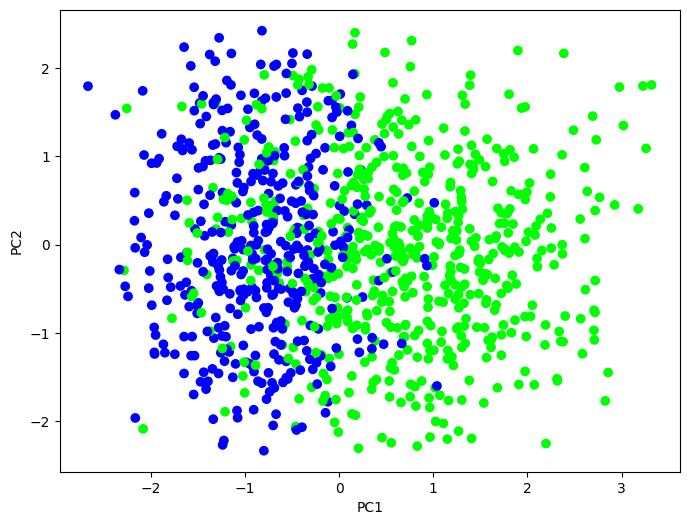

In [92]:
# Plot the data
import matplotlib.pyplot as plt

nr_samples = 1000
fig = plt.figure(figsize=(8, 6))

# 3D if n_components > 2
if pca.n_components > 2:
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_train_pc[:nr_samples, 0], X_train_pc[:nr_samples, 1], X_train_pc[:nr_samples, 2],
               c=y_train[:nr_samples],
               cmap='brg')
    ax.set_zlabel('PC3')
else:
    ax = fig.add_subplot(111)
    ax.scatter(X_train_pc[:nr_samples, 0], X_train_pc[:nr_samples, 1], c=y_train[:nr_samples], cmap='brg')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()

In [93]:
# Train a logistic regression model with principal components
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_pc, y_train)

# Evaluate the model
print("Train accuracy:", logreg.score(X_train_pc, y_train))
print("Test accuracy:", logreg.score(X_test_pc, y_test))

Train accuracy: 0.8287669679152149
Test accuracy: 0.5885916674433778


In [94]:
# Train a logistic regression model with all features
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Evaluate the model
print("Train accuracy:", logreg.score(X_train_scaled, y_train))
print("Test accuracy:", logreg.score(X_test_scaled, y_test))

Train accuracy: 0.8440970709930313
Test accuracy: 0.5864324106005531
